In [2]:
from IPython.display import Image

In [ ]:
# Frequentist and Bayesian approaches differ in two occasions: 
# 1. nuisance parameters
# 2. Bayes credible intervals versus Frequentist confidence intervals.

# *** Nuisance parameter is some parameter that you need as stepping
# stone to find the main parameter (goal).

In [1]:
# EXAMPLE 1 - BAYESIAN BILLIARD GAME: 

# left rolls - Alice gets a point
# right rolls - Bob gets a point

# QUESTION TO ANSWER: after eight rolls in a particular game,
# Alice has 5 points and Bob has 3 points. What is the probability 
# that Bob will squeak-out a win?

# Nuisance parameter here = location of the mark = determined
# by the first roll. It is unknown and not of interest, but must
# be dealt with when predicting subsequent rolls. If the roll
# settles to the right (Bob), then subsequent rolls favor Alice (left).
# But if the first ball settles left (Alice) then subsequent
# rolls favor Bob (right).

In [3]:
# FREQUENTIST APPROACH:

# (because 5 or 8 balls were left for Alice, use binomial likelihood ...)
# max likelihood estimator = p-hat = 5/8

# p-hat = 5/8
# Prob Bob wins = P(B) = (1 - p-hat)^3 
#    (is cubed since Bob needs to win 3 in a row)

pHat = 5 / 8
probBobWin = (1 - pHat)**3
print("Naive Frequentist Probability of Bob Winning: {0:.2f}"
      .format(probBobWin))
oddsAgainstBobWin = (1 - probBobWin) / probBobWin
print("Odds against Bob Winning: {0:.0f} to 1"
      .format(oddsAgainstBobWin))

# the odds means: Alice wins about 18 times for each time Bob wins.

Naive Frequentist Probability of Bob Winning: 0.05
Odds against Bob Winning: 18 to 1


In [2]:
# BAYESIAN APPROACH: 

# B = Bob wins
# D = observed data: D = (num Alice wins, num wins Bob) = (5, 3)
# p = unknown probability that ball lands left (Alice win) during
# the CURRENT game. 
# want to compute: P(B | D) = prob Bob wins given alice has 5 points
# and Bob has 3 = P(Bob wins | D = (5,3))

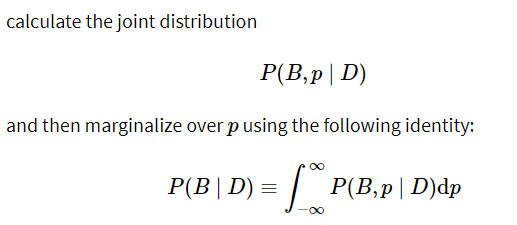

In [10]:
# How to deal with nuisance parameter: marginalizing (integrating)
# the joint probability over entire range of nuisance parameter. 

# Calculate the joint distribution P(B and p | D) and marginalize
# over 'p' using the identity (infinite integral below)
# this identity comes from law of total probability. 

# Frequentists recognize this - just disagree with P(p) being
# a measure of uncertainty of our knowledge. 

Image(filename="images/2_joint_then_marginalize.png")

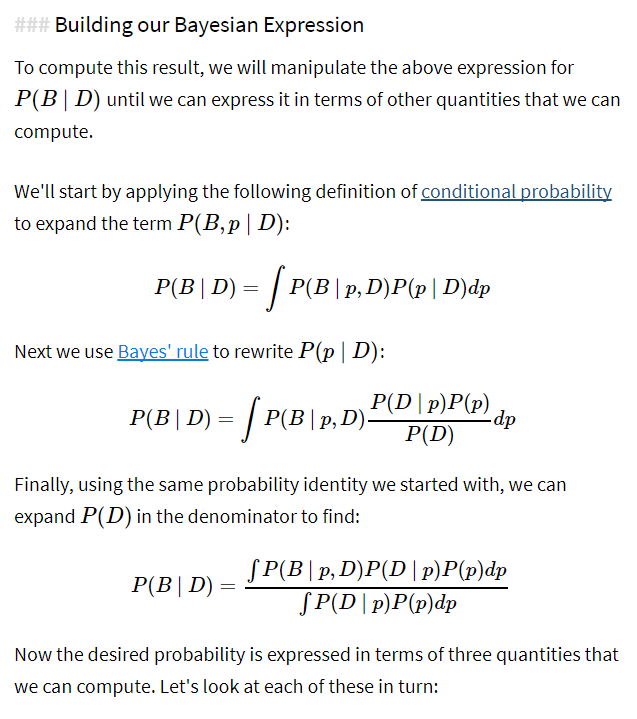

In [11]:
# Now we expand the above expression so it is easier to compute: 
Image(filename="images/2_building.png")

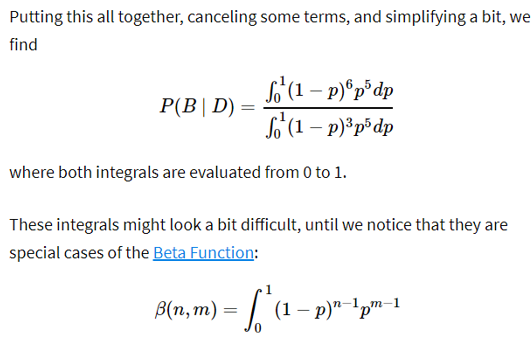

In [13]:
# Meaning of terms:

# P(B | p and D) = frequentist likelihood = given a marker 
# placement 'p' and D = (5, 3) (meaning Alice won 5 times and Bob
# won 3 times), then what is the probability of 
# B = Bob winning 6 total points (meaning 3 more)?

# P(B | p and D) = (1 - p)^3


# P(D | p) = given probability of marker 'p', what is the likelihood
# of exactly 5 positive outcomes of 8 trials? This is binomial: 
# since: P(D | p) proportional to p^5(1-p)^3

# P(p) = prior probability of marker landing left or right = it is
# between 0 and 1. 


# This equals: 
Image(filename="images/2_beta.png")

In [4]:
# evaluate the beta integrals with scipy: 

from scipy.special import beta 

probBobWin_Bayes = beta(6 + 1, 5 + 1) / beta(3 + 1, 5 + 1)

print("BAYESIAN: ")
print("P(B | D) = {0:.2f}".format(probBobWin_Bayes))

oddsAgainstBobWin_Bayes = (1 - probBobWin_Bayes) / probBobWin_Bayes
print("Bayesian odds against Bob winning: {0:.0f} to 1"
      .format(oddsAgainstBobWin_Bayes))



print("\n\nFREQUENTIST (again): ")

print("P(B) = {0:.2f}".format(probBobWin))
print("Odds against Bob Winning: {0:.0f} to 1"
      .format(oddsAgainstBobWin))

BAYESIAN: 
P(B | D) = 0.09
Bayesian odds against Bob winning: 10 to 1


FREQUENTIST (again): 
P(B) = 0.05
Odds against Bob Winning: 18 to 1


In [23]:
# MONTE CARLO APPROACH: tabulates all possible outcomes
# and chooses the fraction of relevant games in which Bob wins.

In [5]:
import numpy as np

np.random.seed(0)

# play 100,000 games with randomly-drawn p, between 0 and 1
p = np.random.random(100000)
print("p = ", p) # the marker array

# each game needs at most 11 rolls for one player to reach 6 wins. 
rolls = np.random.random((11, len(p)))
print("\n---------------\n")
print("rolls: ", rolls)

p =  [ 0.5488135   0.71518937  0.60276338 ...,  0.81013284  0.55103228
  0.22575586]

---------------

rolls:  [[ 0.53525707  0.90404425  0.50239657 ...,  0.21462449  0.29577661
   0.84250419]
 [ 0.21776986  0.58724972  0.9876133  ...,  0.61777137  0.33593841
   0.57938191]
 [ 0.7656045   0.05053638  0.99754485 ...,  0.83193741  0.24255618
   0.0727067 ]
 ..., 
 [ 0.77763131  0.8211841   0.03082633 ...,  0.36259133  0.51650652
   0.90860588]
 [ 0.68955605  0.97451698  0.80805917 ...,  0.31670861  0.12429325
   0.64706746]
 [ 0.88004675  0.14599302  0.10809682 ...,  0.08855736  0.07820356
   0.42345344]]


In [7]:
# count the cumulative wins for Alice and Bob at each roll
cumWinsAlice = np.cumsum(rolls < p, 0)
cumWinsBob = np.cumsum(rolls >= p, 0)
print("cumWinsAlice = ", cumWinsAlice)
print("cumWinsBob = ", cumWinsBob)

cumWinsAlice =  [[ 1  0  1 ...,  1  1  0]
 [ 2  1  1 ...,  2  2  0]
 [ 2  2  1 ...,  2  3  1]
 ..., 
 [ 6  7  4 ...,  7  8  2]
 [ 6  7  4 ...,  8  9  2]
 [ 6  8  5 ...,  9 10  2]]
cumWinsBob =  [[0 1 0 ..., 0 0 1]
 [0 1 1 ..., 0 0 2]
 [1 1 2 ..., 1 0 2]
 ..., 
 [3 2 5 ..., 2 1 7]
 [4 3 6 ..., 2 1 8]
 [5 3 6 ..., 2 1 9]]


In [8]:
# sanity check: total number of wins should equal number of rolls
totalWins = cumWinsBob + cumWinsAlice
#assert np.all(totalWins.transpose() == np.arange(1, 12)) # help: not correct?
print("(Sanity check passed)")


# determine num games which meet criterion of (A wins, B wins) = (5,3)
# this would mean Bob's win count at eight total rolls must equal 3. 
gamesWhereBobHasThreeWins = cumWinsBob[7] == 3 # 8th game wins = 3
print(gamesWhereBobHasThreeWins)
print("Number of suitable games: {0}"
      .format(sum(gamesWhereBobHasThreeWins)))

(Sanity check passed)
[False False False ..., False False False]
Number of suitable games: 11068


In [9]:
# truncate results to consider only these games where 
# num wins = 3 on 8th game. 
cumWinsAlice = cumWinsAlice[:, gamesWhereBobHasThreeWins]
cumWinsBob = cumWinsBob[:, gamesWhereBobHasThreeWins]

print("Alice: \n", cumWinsAlice)
print("\nBob: \n", cumWinsBob)

Alice: 
 [[0 1 1 ..., 1 1 1]
 [1 1 2 ..., 2 2 2]
 [1 2 2 ..., 2 3 3]
 ..., 
 [6 6 5 ..., 5 6 6]
 [7 6 5 ..., 5 6 6]
 [8 6 5 ..., 6 7 6]]

Bob: 
 [[1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [2 1 1 ..., 1 0 0]
 ..., 
 [3 3 4 ..., 4 3 3]
 [3 4 5 ..., 5 4 4]
 [3 5 6 ..., 5 4 5]]


In [10]:
# determine which of these games Bob won.
# (where he got 6 wins after 11 rolls)
gamesWhereBobWon = np.sum(cumWinsBob[10] == 6)
print("Num games Bob won: {0}".format(gamesWhereBobWon))

# compute probability
probBobWin_mc = gamesWhereBobWon / sum(gamesWhereBobHasThreeWins)
oddsAgainstBobWin_mc = (1 - probBobWin_mc) / probBobWin_mc

print("Monte carlo probability of Bon win: {0:.2f}"
      .format(probBobWin_mc))
print("MC odds against Bob win: {0:0f} to 1"
      .format(oddsAgainstBobWin_mc))

Num games Bob won: 979
Monte carlo probability of Bon win: 0.09
MC odds against Bob win: 10.305414 to 1


In [82]:
# so the monte carlo agrees with bayesian approach, so naive
# frequentist was flawed. 
# There are other non-naive frequentist methods but Bayesian 
# marginalization over 'p' is very good.

In [23]:
# EXAMPLE 2: Linear Fit with Outliers

In [11]:
x = np.array([ 0,  3,  9, 14, 15, 19, 20, 21, 30, 35,
               40, 41, 42, 43, 54, 56, 67, 69, 72, 88])
y = np.array([33, 68, 34, 34, 37, 71, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71])
e = np.array([ 3.6, 3.9, 2.6, 3.4, 3.8, 3.8, 2.2, 2.1, 2.3, 3.8,
               2.2, 2.8, 3.9, 3.1, 3.4, 2.6, 3.4, 3.7, 2.0, 3.5])

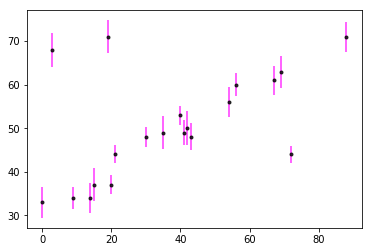

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gcf().set_facecolor("white")
plt.errorbar(x, y, e, fmt='.k', ecolor='magenta', alpha=0.8);

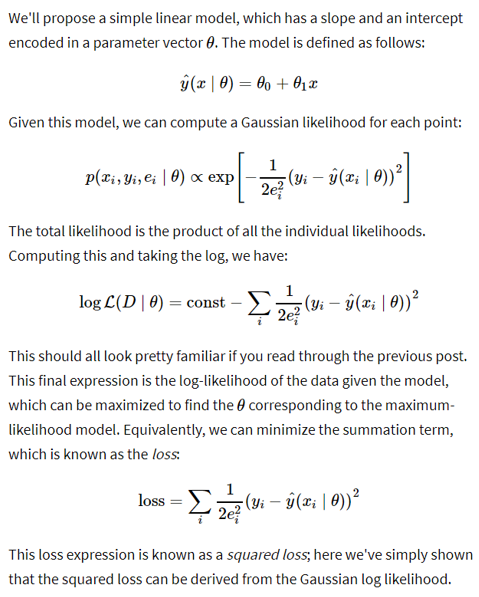

In [88]:
# max likelihood = linear fit = equivalent in both Frequentist
# and Bayes approaches (with uniform priors)

# y(x | theta) = theta_0 + theta_1 * x
Image(filename="images/2_linearfit.png")

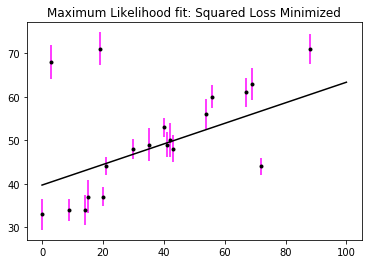

In [13]:
### APPROACH 1: Standard Likelihood approach

# we minimize the loss, max the lik to find theta. 
# use scipy optimize to minimize loss

from scipy import optimize

def squaredLossRegression(theta, x = x, y = y, e = e):
    dy = y - theta[0] - theta[1] * x 
    return np.sum(0.5 * (dy / e)**2)

#optimizing
theta_1 = optimize.fmin(squaredLossRegression, [0,0], disp=False)

#plotting
xfit = np.linspace(0, 100)
plt.gcf().set_facecolor("white")
plt.errorbar(x,y,e, fmt='.k', ecolor="magenta")
plt.plot(xfit, theta_1[0] + theta_1[1] * xfit, '-k')
plt.title("Maximum Likelihood fit: Squared Loss Minimized");

In [ ]:
# observation: outliers are influencing the fit because of the
# squared loss function - if an outlier is 10 stddevs away from 
# the fit, its contribution to the loss will outweigh that
# of 25 points which are 2 stddevs away. 

# How to fix this in frequentist environment: adjust the loss
# function to be more robust (Huber).

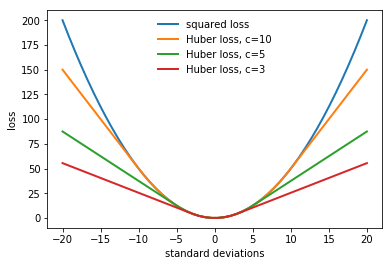

In [14]:
### APPROACH 2: Frequentist Correction for Outliers: Huber Loss

# The Huber loss function defines a critical value at which the loss 
# curve transitions from quadratic to linear (a dampening effect
# on strong outliers). 

t = np.linspace(-20, 20)

def huberLossFunction(t, crit=3):
    return ((abs(t) < crit) * 0.5*t**2 + 
            (abs(t) >= crit) * -crit * (0.5 * crit - abs(t)))

# Comparing Huber Loss to the ordinary squared loss function for
# several critical values: 

plt.gcf().set_facecolor("white")
plt.plot(t, 0.5*t**2, label="squared loss", lw=2)

for c in (10, 5, 3):
    plt.plot(t, huberLossFunction(t, c), 
             label="Huber loss, c={0}".format(c), lw=2)
    
plt.ylabel("loss")
plt.xlabel("standard deviations")
plt.legend(loc="best", frameon=False)


# Observation: Huber loss is equivalent to ordinary squared loss
# for points which are well-fit by the model (signaled by when
# standard devs are small?) but reduces the loss contribution
# of outliers. A point 20 stddevs away from fit has squared loss 
# of 200 but a c = 3 Huber loss is 55.

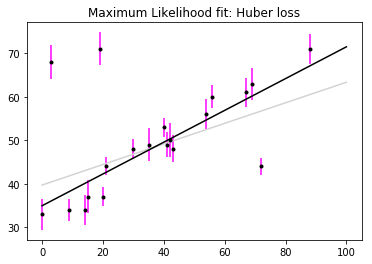

In [27]:
def huberLossRegression(theta, x=x, y=y, e=e, c=3):
    return sum(huberLossFunction((y - theta[0] - theta[1]*x)/e, c))

# finding huber slope
theta_2 = optimize.fmin(huberLossRegression, [0, 0], disp=False)

# plotting
plt.gcf().set_facecolor("white")
plt.errorbar(x, y, e, fmt='.k', ecolor='magenta')
# plotting old reg line with old theta_1 slope
plt.plot(xfit, theta_1[0] + theta_1[1] * xfit, color='lightgray')
plt.plot(xfit, theta_2[0] + theta_2[1] * xfit, color='black')
plt.title('Maximum Likelihood fit: Huber loss');

In [ ]:
# This huber loss regression line is closer to intuition
# of how the reg line should fit the data - but decision of the
# critical value c is ad-hoc - better use Bayes method.

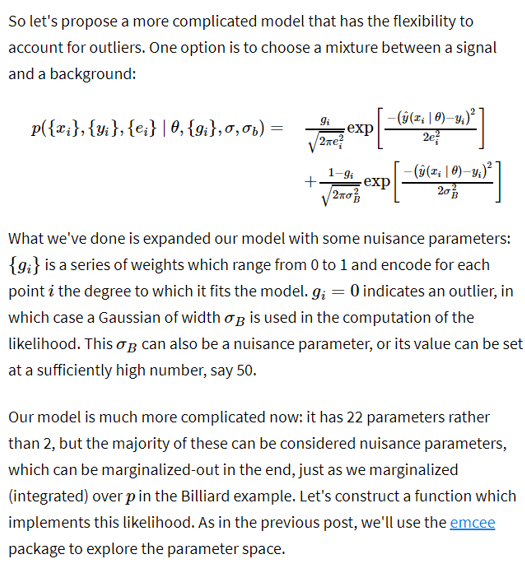

In [99]:
### APPROACH 3: Bayesian approach to outliers: Nuisance Parameters.

# use a weight function that for each i, decides how to echo the 
# outlier. 

Image(filename="images/2_approach3.png")

In [15]:
# theta is array of length 2 + N, where N = num points.
# theta[0] = intercept
# theta[1] = slope
# theta[2 + i] = weight g_i

def logPrior(theta):
    # g_i must be between 0 and 1
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0
    else:
        return -np.inf # because log(0) = -inf

def logLikelihood(theta, x, y, e, sigmaB):
    dy = y - theta[0] - theta[1] * x
    # g<0 or g>1 leads to NaNs in logarithm
    g = np.clip(theta[2:], 0, 1)  
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - \
            0.5 * (dy / e) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigmaB ** 2) - \
            0.5 * (dy / sigmaB) ** 2
    return np.sum(np.logaddexp(logL1, logL2))

def logPosterior(theta, x, y, e, sigmaB):
    return logPrior(theta) + logLikelihood(theta, x, y, e, sigmaB)

In [20]:
# Note that this step will take a few minutes to run!

ndim = 2 + len(x)  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 10000  # "burn-in" period to let chains stabilize
nsteps = 15000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(theta_1, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, logPosterior, args=[x, y, e, 50])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

/datascience/bin/python/anaconda3/envs/bayes/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/datascience/bin/python/anaconda3/envs/bayes/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


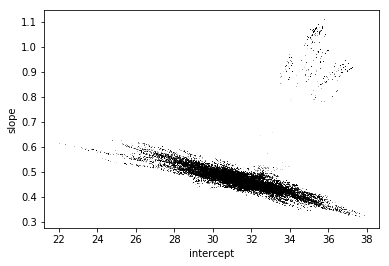

In [24]:
# For the above samples, can use Markov chains property - because
# their distribution models the posterior, we can integrate out
# (i.e. marginalize over) nuisance parameters by ignoring them. 

plt.gcf().set_facecolor("white")
plt.plot(sample[:, 0], sample[:, 1], ',k', alpha=0.1)
plt.xlabel('intercept')
plt.ylabel('slope');

# Observe: points distribution has slope near 0.45 and intercept 0.31.

g1 mean: 0.61
g2 mean: 0.45


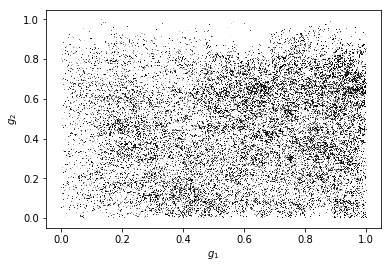

In [25]:
# One nice feature of analyzing MCMC samples is that the choice of 
# nuisance parameters is completely symmetric: just as we can treat 
# the {gi} as nuisance parameters, we can also treat the slope 
# and intercept as nuisance parameters!

plt.gcf().set_facecolor("white")
plt.plot(sample[:, 2], sample[:, 3], ',k', alpha=0.1)
plt.xlabel('$g_1$')
plt.ylabel('$g_2$')

print("g1 mean: {0:.2f}".format(sample[:, 2].mean()))
print("g2 mean: {0:.2f}".format(sample[:, 3].mean()))

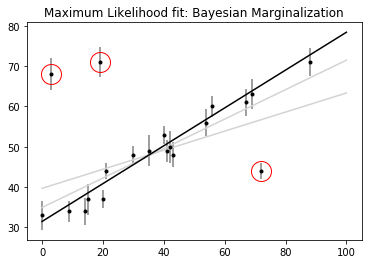

In [28]:
# Observation: 
# (g1, g2) = (1, 0) is favorite: means of g1 and g2 are greater than
# and less than 0.5, respectively.  If we choose cutoff at g = 0.5, 
# then our algorithm identifies g2 as outlier. 

# plotting the marginalized best model over original data. Add red
# circles to indicate which points the models detects as outliers. 

theta_3 = np.mean(sample[:, :2], 0)
g = np.mean(sample[:, 2:], 0)
outliers = (g < 0.5)

plt.gcf().set_facecolor("white")
plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta_1[0] + theta_1[1] * xfit, color='lightgray')
plt.plot(xfit, theta_2[0] + theta_2[1] * xfit, color='lightgray')
plt.plot(xfit, theta_3[0] + theta_3[1] * xfit, color='black')
plt.plot(x[outliers], y[outliers], 'ro', ms=20, mfc='none', mec='red')
plt.title('Maximum Likelihood fit: Bayesian Marginalization');

# Observe: the dark line matches our intuition (bayes approach). 
# and the outliers found match our intuition as well. 
# gray lines show previous two approaches: lowest is standard, 
# middle lowest is huber.